2. Setting Up Azure Databricks Workspace and Configuring Clusters

In [0]:
dbutils.fs.cp("file:/Workspace/Shared/large_sales_data.csv", "dbfs:/FileStore/csv/large_sales_data.csv")
df=spark.read.format("csv").option ("header", "true").load("/FileStore/csv/large_sales_data.csv")
df.show()

+--------+----------+-----------+--------+-----+-----+
|order_id|   product|   category|quantity|price|sales|
+--------+----------+-----------+--------+-----+-----+
|    1001|    Tablet|Electronics|       2|  456| 3936|
|    1002|Smartphone|Accessories|       6| 1109| 4266|
|    1003|Smartwatch|Electronics|       8| 1252| 3088|
|    1004|Smartwatch|Electronics|       9|  346|  517|
|    1005|Headphones|Accessories|       2|  898| 1972|
|    1006|    Laptop|Electronics|       6| 1014| 4751|
|    1007|Smartwatch|Electronics|       4| 1687| 2200|
|    1008|Smartwatch|Accessories|       7| 1475| 2348|
|    1009|    Laptop|Accessories|       1| 1895|   95|
|    1010|    Laptop|Accessories|       1|  383| 2531|
|    1011|    Tablet|Accessories|       1| 1186|  542|
|    1012|Smartphone|Electronics|       5|  788| 4134|
|    1013|    Laptop|Accessories|       8|  927| 4533|
|    1014|    Tablet|Accessories|       2|  137| 4162|
|    1015|    Tablet|Electronics|       7|  628| 4769|
|    1016|

3. Real-Time Data Processing with Databricks

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("RealTimeAggregation").getOrCreate()

schema = """
order_id STRING, 
product STRING, 
category STRING, 
quantity INT, 
price DOUBLE, 
sales DOUBLE
"""

streaming_data = spark.readStream.format("csv").schema(schema).option("header", "true").load("dbfs:/FileStore/csv/")

aggregated_data = streaming_data.groupBy("product").agg({"sales": "sum"}).withColumnRenamed("sum(sales)", "total_sales")

query = aggregated_data.writeStream.outputMode("complete").format("console").start()

query.awaitTermination(60)
query.stop()

display(aggregated_data)

product,total_sales
Smartwatch,46163.0
Laptop,37752.0
Tablet,68824.0
Smartphone,43327.0
Headphones,44834.0


4. Data Exploration and Visualization in Databricks

+-------+-----------------+------------------+
|summary|         quantity|             sales|
+-------+-----------------+------------------+
|  count|              100|               100|
|   mean|             5.04|            2409.0|
| stddev|2.542249063925544|1460.6986013686753|
|    min|                1|              1003|
|    max|                9|                96|
+-------+-----------------+------------------+



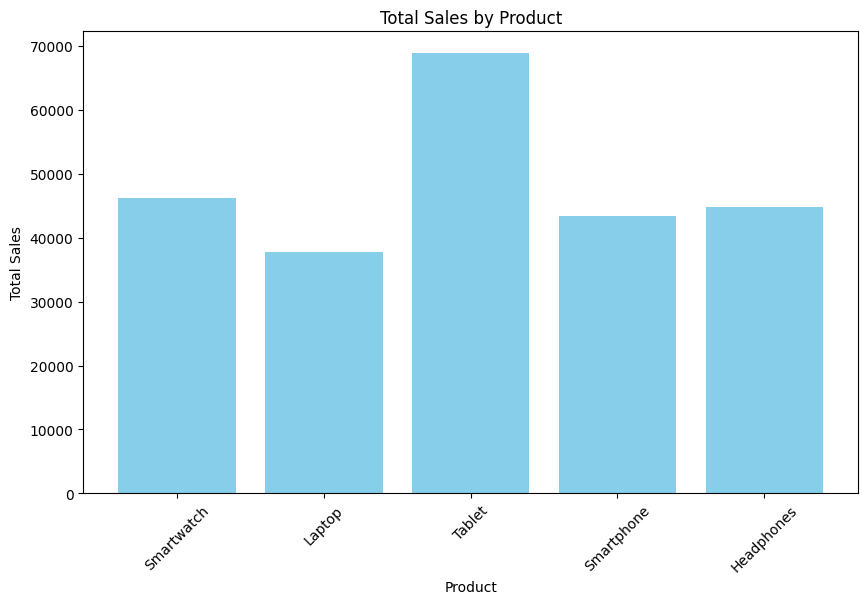

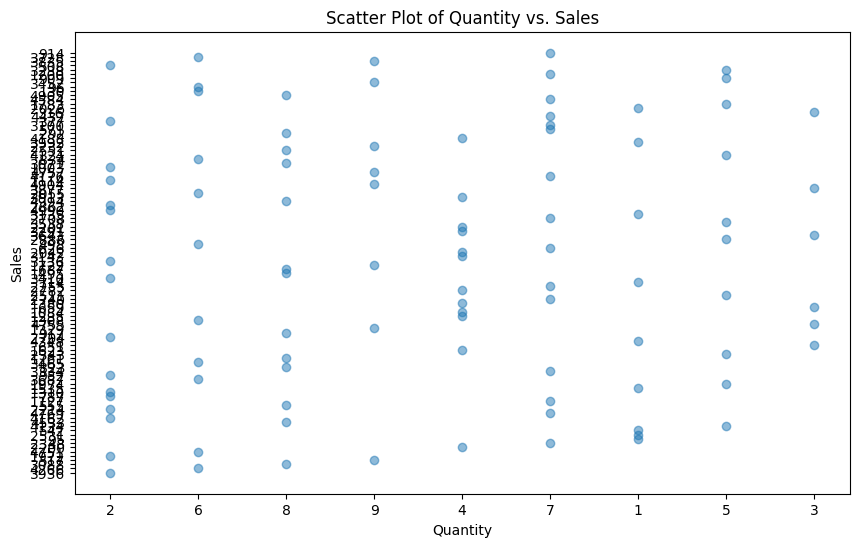

In [0]:
#exploratory data analysis (EDA).
df.describe(['quantity', 'sales']).show()

# Bar chart for total sales by product
from pyspark.sql.functions import sum
import matplotlib.pyplot as plt

product_sales = df.groupBy("product").agg(sum("sales").alias("total_sales"))
pandas_product_sales = product_sales.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pandas_product_sales['product'], pandas_product_sales['total_sales'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for quantity vs. sales
pandas_df = df.toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['quantity'], pandas_df['sales'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Scatter Plot of Quantity vs. Sales')
plt.show()

6. Reading and Writing Data in Databricks

In [0]:
df_csv = spark.read.csv("dbfs:/FileStore/large_sales_data.csv", header=True, inferSchema=True)
#Delta
df_csv.write.format("delta").save("dbfs:/FileStore/sales_delta_table")
print("Writing to the delta table completed")
#Parquet
df_csv.write.parquet("dbfs:/FileStore/sales_parquet_table")
print("Writing to the parquet file completed")
#JSON
df_csv.write.json("dbfs:/FileStore/sales_json_table")
print("Writing to the json file completed")

Writing to the delta table completed
Writing to the parquet file completed
Writing to the json file completed


7. Analyzing and Visualizing Streaming Data with Databricks

In [0]:
schema = """
order_id STRING, 
product STRING, 
category STRING, 
quantity INT, 
price DOUBLE, 
sales DOUBLE
"""

streaming_data = spark.readStream.schema(schema).csv("dbfs:/FileStore/csv")

query = streaming_data.writeStream.format("memory").queryName("streaming_sales_data").outputMode("append").start()

query.awaitTermination(60)
query.stop()

# Visualize real-time data
display(spark.sql("SELECT * FROM streaming_sales_data"))


order_id,product,category,quantity,price,sales
order_id,product,category,null,null,null
1001,Tablet,Electronics,2,456.0,3936.0
1002,Smartphone,Accessories,6,1109.0,4266.0
1003,Smartwatch,Electronics,8,1252.0,3088.0
1004,Smartwatch,Electronics,9,346.0,517.0
1005,Headphones,Accessories,2,898.0,1972.0
1006,Laptop,Electronics,6,1014.0,4751.0
1007,Smartwatch,Electronics,4,1687.0,2200.0
1008,Smartwatch,Accessories,7,1475.0,2348.0
1009,Laptop,Accessories,1,1895.0,95.0


8. Introduction to Databricks Delta Lake

In [0]:
df.write.format("delta").mode("overwrite").save("/delta/new_data")

# Updating the Delta Table
spark.sql("UPDATE delta.`/delta/new_data` SET quantity = quantity * 25 WHERE order_id = 1003")
updated_df = spark.read.format("delta").load("/delta/new_data")
display(updated_df)

# Reading the previous version of the Delta Table
previous_version = spark.read.format("delta").option("versionAsOf", 0).load("/delta/new_data")
display(previous_version)

# Optimize the Delta table
spark.sql("""
    OPTIMIZE delta.`/delta/new_data` ZORDER BY order_id
""")

# Vacuum the Delta table
spark.sql("""
    VACUUM delta.`/delta/new_data` RETAIN 168 HOURS
""")

order_id,product,category,quantity,price,sales
1001,Tablet,Electronics,2,456,3936
1002,Smartphone,Accessories,6,1109,4266
1004,Smartwatch,Electronics,9,346,517
1005,Headphones,Accessories,2,898,1972
1006,Laptop,Electronics,6,1014,4751
1007,Smartwatch,Electronics,4,1687,2200
1008,Smartwatch,Accessories,7,1475,2348
1009,Laptop,Accessories,1,1895,95
1010,Laptop,Accessories,1,383,2531
1011,Tablet,Accessories,1,1186,542


order_id,product,category,quantity,price,sales
1001,Tablet,Electronics,2,456,3936
1002,Smartphone,Accessories,6,1109,4266
1003,Smartwatch,Electronics,8,1252,3088
1004,Smartwatch,Electronics,9,346,517
1005,Headphones,Accessories,2,898,1972
1006,Laptop,Electronics,6,1014,4751
1007,Smartwatch,Electronics,4,1687,2200
1008,Smartwatch,Accessories,7,1475,2348
1009,Laptop,Accessories,1,1895,95
1010,Laptop,Accessories,1,383,2531


DataFrame[path: string]

9. Managed and Unmanaged Tables

In [0]:
# Creating a managed table
df.write.saveAsTable("managed_sales_data")

# Creating an unmanaged table with external location
df.write.option("path", "/mnt/data/external_sales_data").saveAsTable("unmanaged_sales_data")

# Query both tables
spark.sql("SELECT * FROM managed_sales_data").show()
spark.sql("SELECT * FROM unmanaged_sales_data").show()


+--------+----------+-----------+--------+-----+-----+
|order_id|   product|   category|quantity|price|sales|
+--------+----------+-----------+--------+-----+-----+
|    1001|    Tablet|Electronics|       2|  456| 3936|
|    1002|Smartphone|Accessories|       6| 1109| 4266|
|    1003|Smartwatch|Electronics|       8| 1252| 3088|
|    1004|Smartwatch|Electronics|       9|  346|  517|
|    1005|Headphones|Accessories|       2|  898| 1972|
|    1006|    Laptop|Electronics|       6| 1014| 4751|
|    1007|Smartwatch|Electronics|       4| 1687| 2200|
|    1008|Smartwatch|Accessories|       7| 1475| 2348|
|    1009|    Laptop|Accessories|       1| 1895|   95|
|    1010|    Laptop|Accessories|       1|  383| 2531|
|    1011|    Tablet|Accessories|       1| 1186|  542|
|    1012|Smartphone|Electronics|       5|  788| 4134|
|    1013|    Laptop|Accessories|       8|  927| 4533|
|    1014|    Tablet|Accessories|       2|  137| 4162|
|    1015|    Tablet|Electronics|       7|  628| 4769|
|    1016|

10. Views and Temporary Views

In [0]:
# Create a temporary view
df.createOrReplaceTempView("temp_sales_view")

# Create a global temporary view
df.createGlobalTempView("global_temp_sales_view")

# Query the temporary and global views
spark.sql("SELECT * FROM temp_sales_view WHERE sales > 500").show()
spark.sql("SELECT * FROM global_temp.global_temp_sales_view WHERE sales > 500").show()


+--------+----------+-----------+--------+-----+-----+
|order_id|   product|   category|quantity|price|sales|
+--------+----------+-----------+--------+-----+-----+
|    1001|    Tablet|Electronics|       2|  456| 3936|
|    1002|Smartphone|Accessories|       6| 1109| 4266|
|    1003|Smartwatch|Electronics|       8| 1252| 3088|
|    1004|Smartwatch|Electronics|       9|  346|  517|
|    1005|Headphones|Accessories|       2|  898| 1972|
|    1006|    Laptop|Electronics|       6| 1014| 4751|
|    1007|Smartwatch|Electronics|       4| 1687| 2200|
|    1008|Smartwatch|Accessories|       7| 1475| 2348|
|    1010|    Laptop|Accessories|       1|  383| 2531|
|    1011|    Tablet|Accessories|       1| 1186|  542|
|    1012|Smartphone|Electronics|       5|  788| 4134|
|    1013|    Laptop|Accessories|       8|  927| 4533|
|    1014|    Tablet|Accessories|       2|  137| 4162|
|    1015|    Tablet|Electronics|       7|  628| 4769|
|    1016|    Tablet|Electronics|       2|  775| 2214|
|    1017|